## Step 1: Reading and Understanding the Data

In [1]:
# Filter Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [3]:
# Read the data from csv file

df = pd.read_csv('day.csv')

In [4]:
# Check the head of the dataset
 
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [5]:
# Checking the shape of dataframe

df.shape

(730, 16)

In [6]:
# Describing the columns of dataframe

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
# Get the info about columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Checking for the null values in column data
# Since there are no null values we are good to go!

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# Dropping the unwanted columns
# 'instant' has only index for the row, 'dteday' has date which can be compensated by year and month column
# 'casual' and 'registered' seems to be the breakup by category for cnt column which is our TRAGET VARIABLE!

df.drop(['dteday','casual','registered'],axis=1,inplace=True)

In [10]:
df.drop(['instant'],axis=1,inplace=True)

In [11]:
df.shape

(730, 12)

In [13]:
# Mapping the season column with meaningful categories

df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [15]:
# Mapping the month column

df.mnth = df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [17]:
# Mapping the weekday column

df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [18]:
# Mapping the weathersit column

df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [19]:
# Check the head of the dataset

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [18]:
# check the column info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Step 2: Visualising the Data

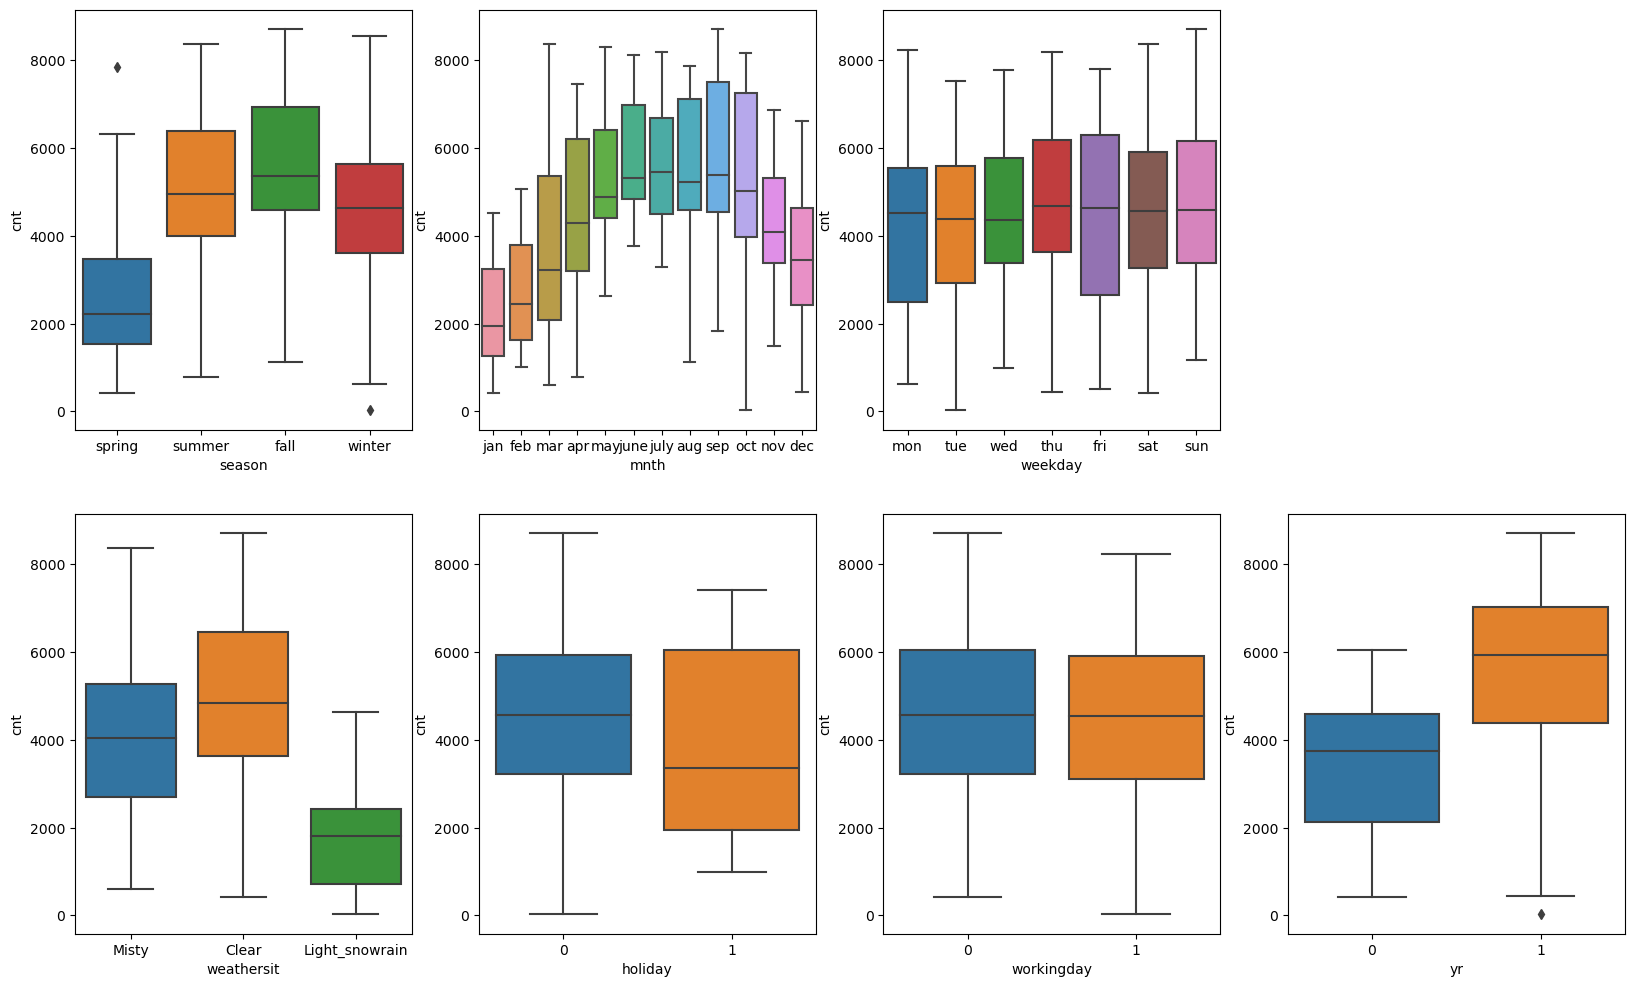

In [20]:
# Analysing/visualizing the categorical columns to see how predictor variable stands against the target variable
# 'cnt' is our target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,8)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.show()

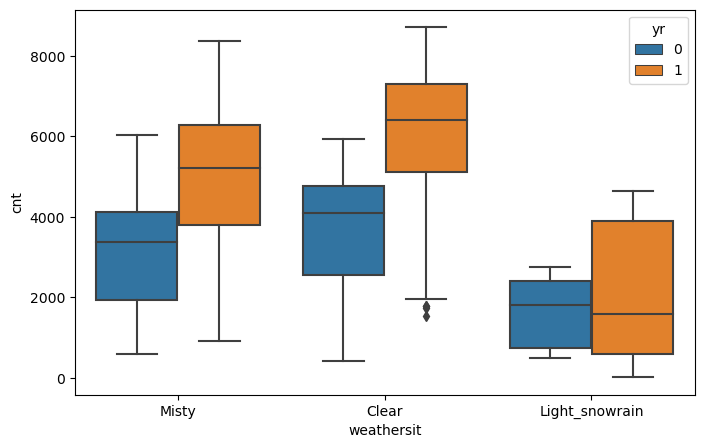

In [22]:
# Visualizing Catagorical variables

plt.figure(figsize = (8, 5))
sns.boxplot(x = 'weathersit', y = 'cnt', hue = 'yr', data = df)
plt.show()

Clear weather attracted more booking which seems obvious. And in comparison to previous year, i.e 2018, booking increased for each weather situation.

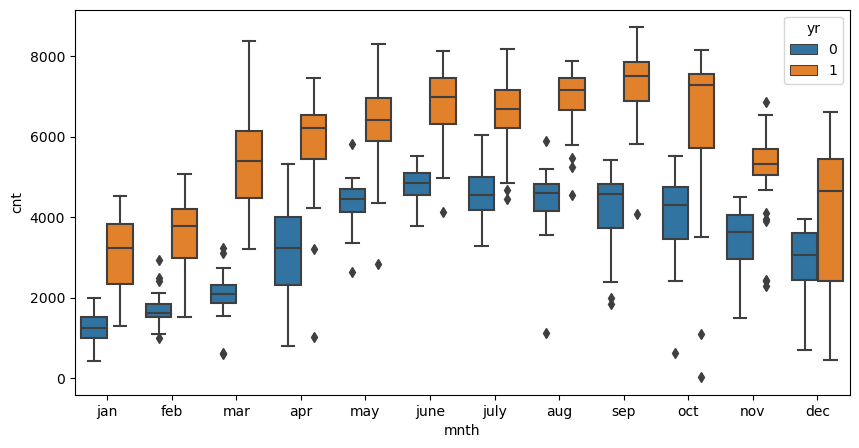

In [24]:
# Plotting month wise

plt.figure(figsize = (10, 5))
sns.boxplot(x = 'mnth', y = 'cnt', hue = 'yr', data = df)
plt.show()

Most of the bookings has been done during the month of may, june, july, aug, sep and oct. Trend increased starting of the year till mid of the year and then it started decreasing as we approached the end of year. Number of booking for each month seems to have increased from 2018 to 2019.

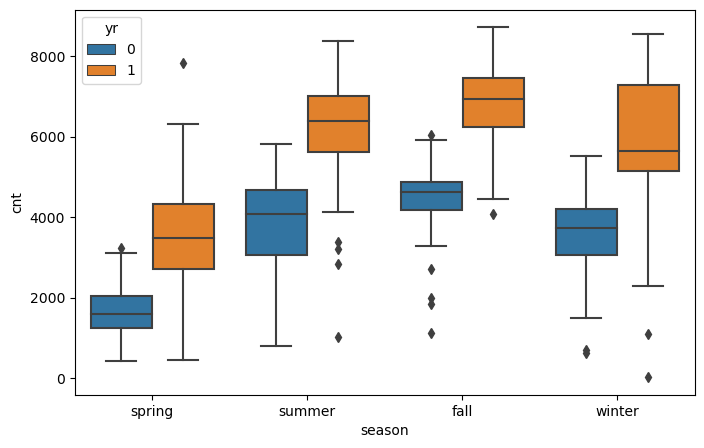

In [25]:
# Plotting visualization for season column

plt.figure(figsize = (8, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'yr', data = df)
plt.show()

Except Spring it seems all the other seasons have upward trends with maximum bookig during fall season. And there seems to be an increased in booking form 2018 to 2019. Year 2019 is coming out to be the ideal year as per the bookings scenerio.

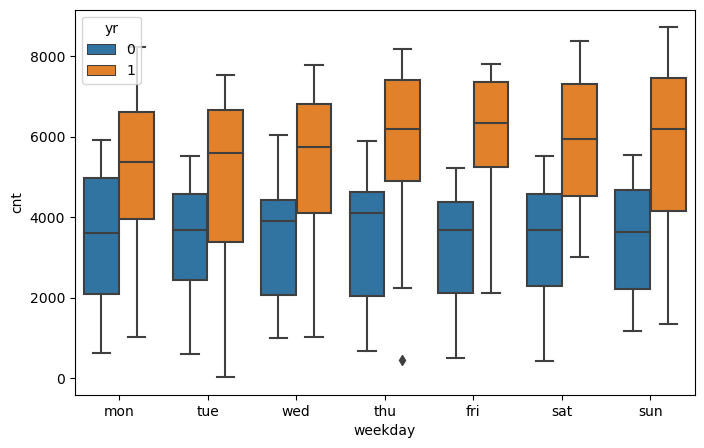

In [26]:
# Plotting visualization for weekday column

plt.figure(figsize = (8, 5))
sns.boxplot(x = 'weekday', y = 'cnt', hue = 'yr', data = df)
plt.show()

Thu, Fir, Sat and Sun have more number of bookings as compared to the start of the week and as before 2019 saw an upward trend from previous year.

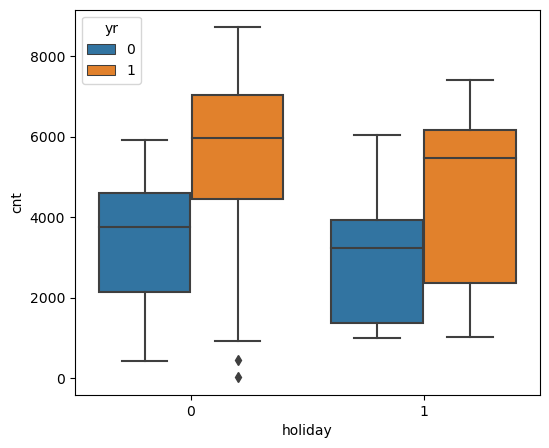

In [28]:
# Plotting visualization for holiday column

plt.figure(figsize = (6, 5))
sns.boxplot(x = 'holiday', y = 'cnt', hue = 'yr', data = df)
plt.show()

When its not holiday, booking seems to be less in number which seems reasonable as on holidays, people may want to spend time at home and enjoy with family.

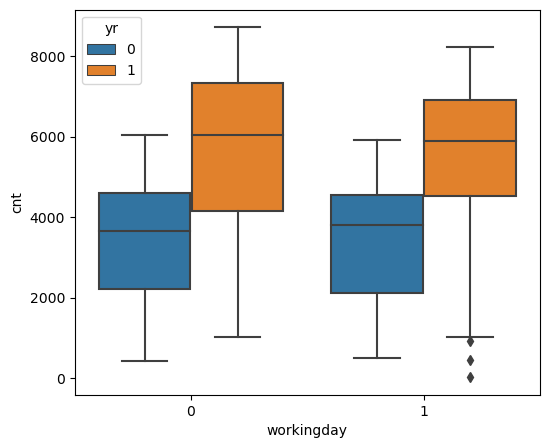

In [30]:
# plotting visualization for workingday column

plt.figure(figsize = (6, 5))
sns.boxplot(x = 'workingday', y = 'cnt', hue = 'yr', data = df)
plt.show()

Booking seemed to be almost equal either on working day or non-working day. But, the count increased from 2018 to 2019.

In all the Columns 2019 attracted more number of booking from the previous year, which shows good progress in terms of business.

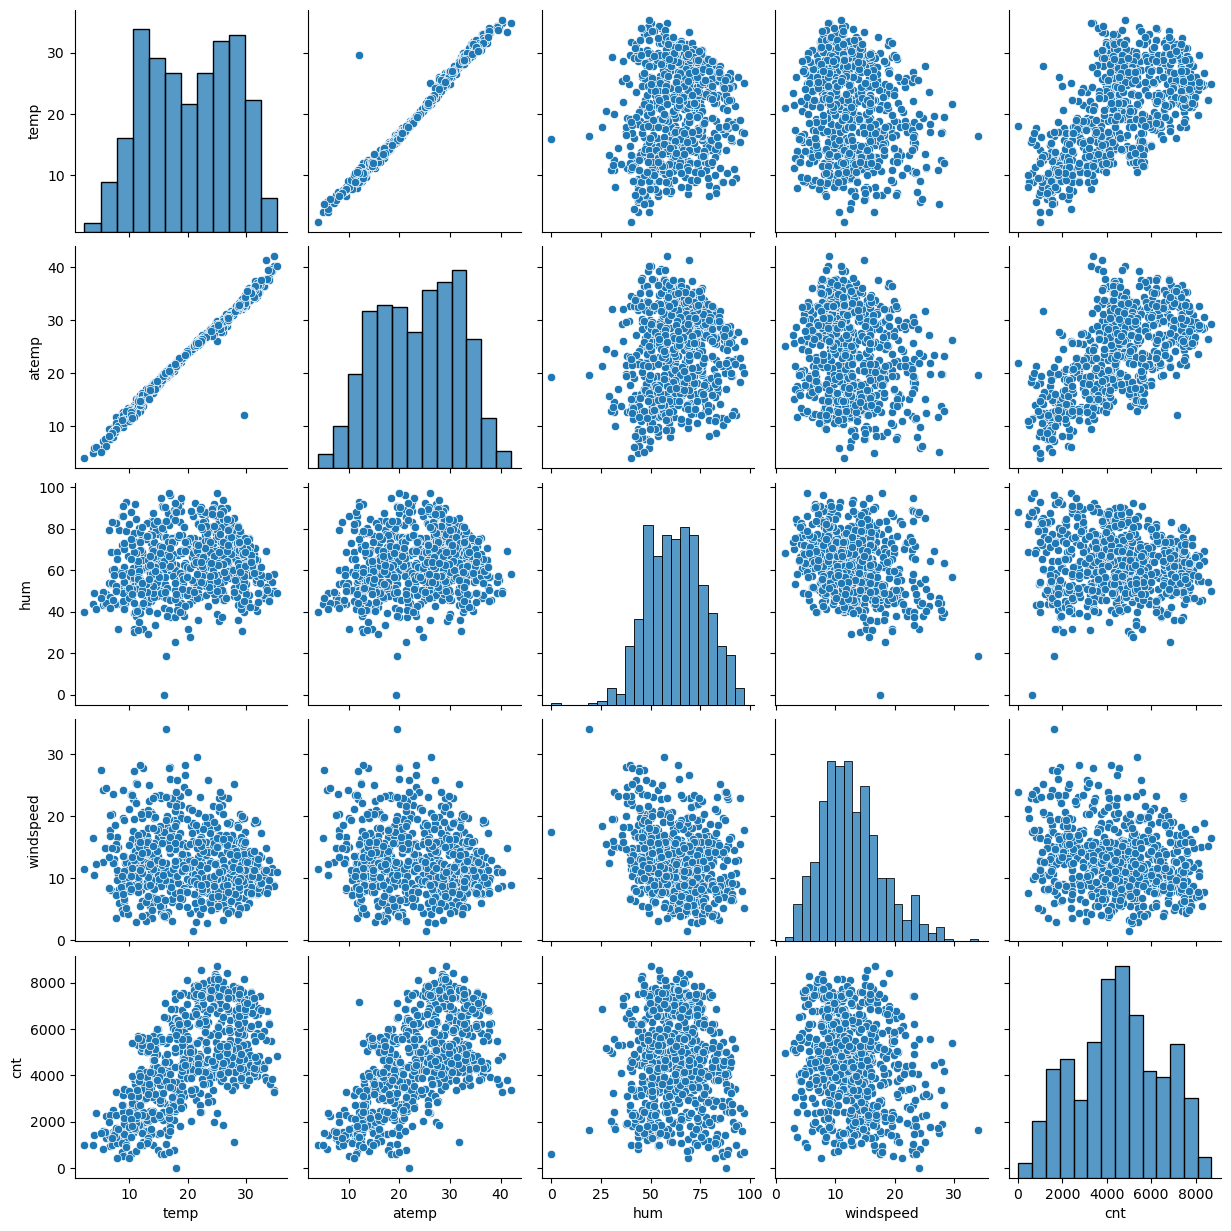

In [32]:
# Analysing/visualizing the numerical columns

sns.pairplot(data=df,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

## Step 3: Data Preparation

In [35]:
# Dummy variable creation for month, weekday, weathersit and season variables.

mnths_df = pd.get_dummies(df.mnth,drop_first=True)
weekdays_df = pd.get_dummies(df.weekday,drop_first=True)
weathersit_df = pd.get_dummies(df.weathersit,drop_first=True)
seasons_df = pd.get_dummies(df.season,drop_first=True)

In [37]:
# Merging the dataframe, with the dummy variable dataset. 

df_new = pd.concat([df, mnths_df, weekdays_df, weathersit_df, seasons_df],axis=1)

In [38]:
df_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,1,1,0,0
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,1,0,0
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,1,0,0
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [39]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    uint8  
 13  dec             730 non-null    uint8  
 14  feb             730 non-null    uint8  
 15  jan             730 non-null    uint8  
 16  july            730 non-null    uint8  
 17  june            730 non-null    uin

In [40]:
# Dropping unnecessary columns as we have already created dummy variable out of it.

df_new.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [41]:
# Check the head of new dataframe

df_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,1,0,0


In [42]:
# Check the column info of new dataframe 

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    uint8  
 9   dec             730 non-null    uint8  
 10  feb             730 non-null    uint8  
 11  jan             730 non-null    uint8  
 12  july            730 non-null    uint8  
 13  june            730 non-null    uint8  
 14  mar             730 non-null    uint8  
 15  may             730 non-null    uint8  
 16  nov             730 non-null    uint8  
 17  oct             730 non-null    uin

## Step 4: Splitting the Data into Training and Testing Sets

In [43]:
# Splitting the dataframe into Train and Test

np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size = 0.7, test_size = 0.3, random_state = 100)

In [44]:
# Check the shape of training datatset

df_train.shape

(510, 30)

In [45]:
# Check the shape of testing datatset

df_test.shape

(219, 30)

In [46]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [47]:
# Verifying the head of dataset before scaling.

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,0,1,0,0,0,0,1
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,0,1,0,0,0,0,1,0,1,0


In [49]:
# Apply scaler() to all the columns except the 'yr', 'workingday' and 'dummy' variables

num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [50]:
# Verifying the head after appying scaling.

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,1,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,1,0,0,0,0,1,0,1,0


In [51]:
# Describing the dataset

df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.096078,0.084314,...,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137,0.243137,0.245098,0.24902
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.294988,0.278131,...,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223,0.429398,0.430568,0.43287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


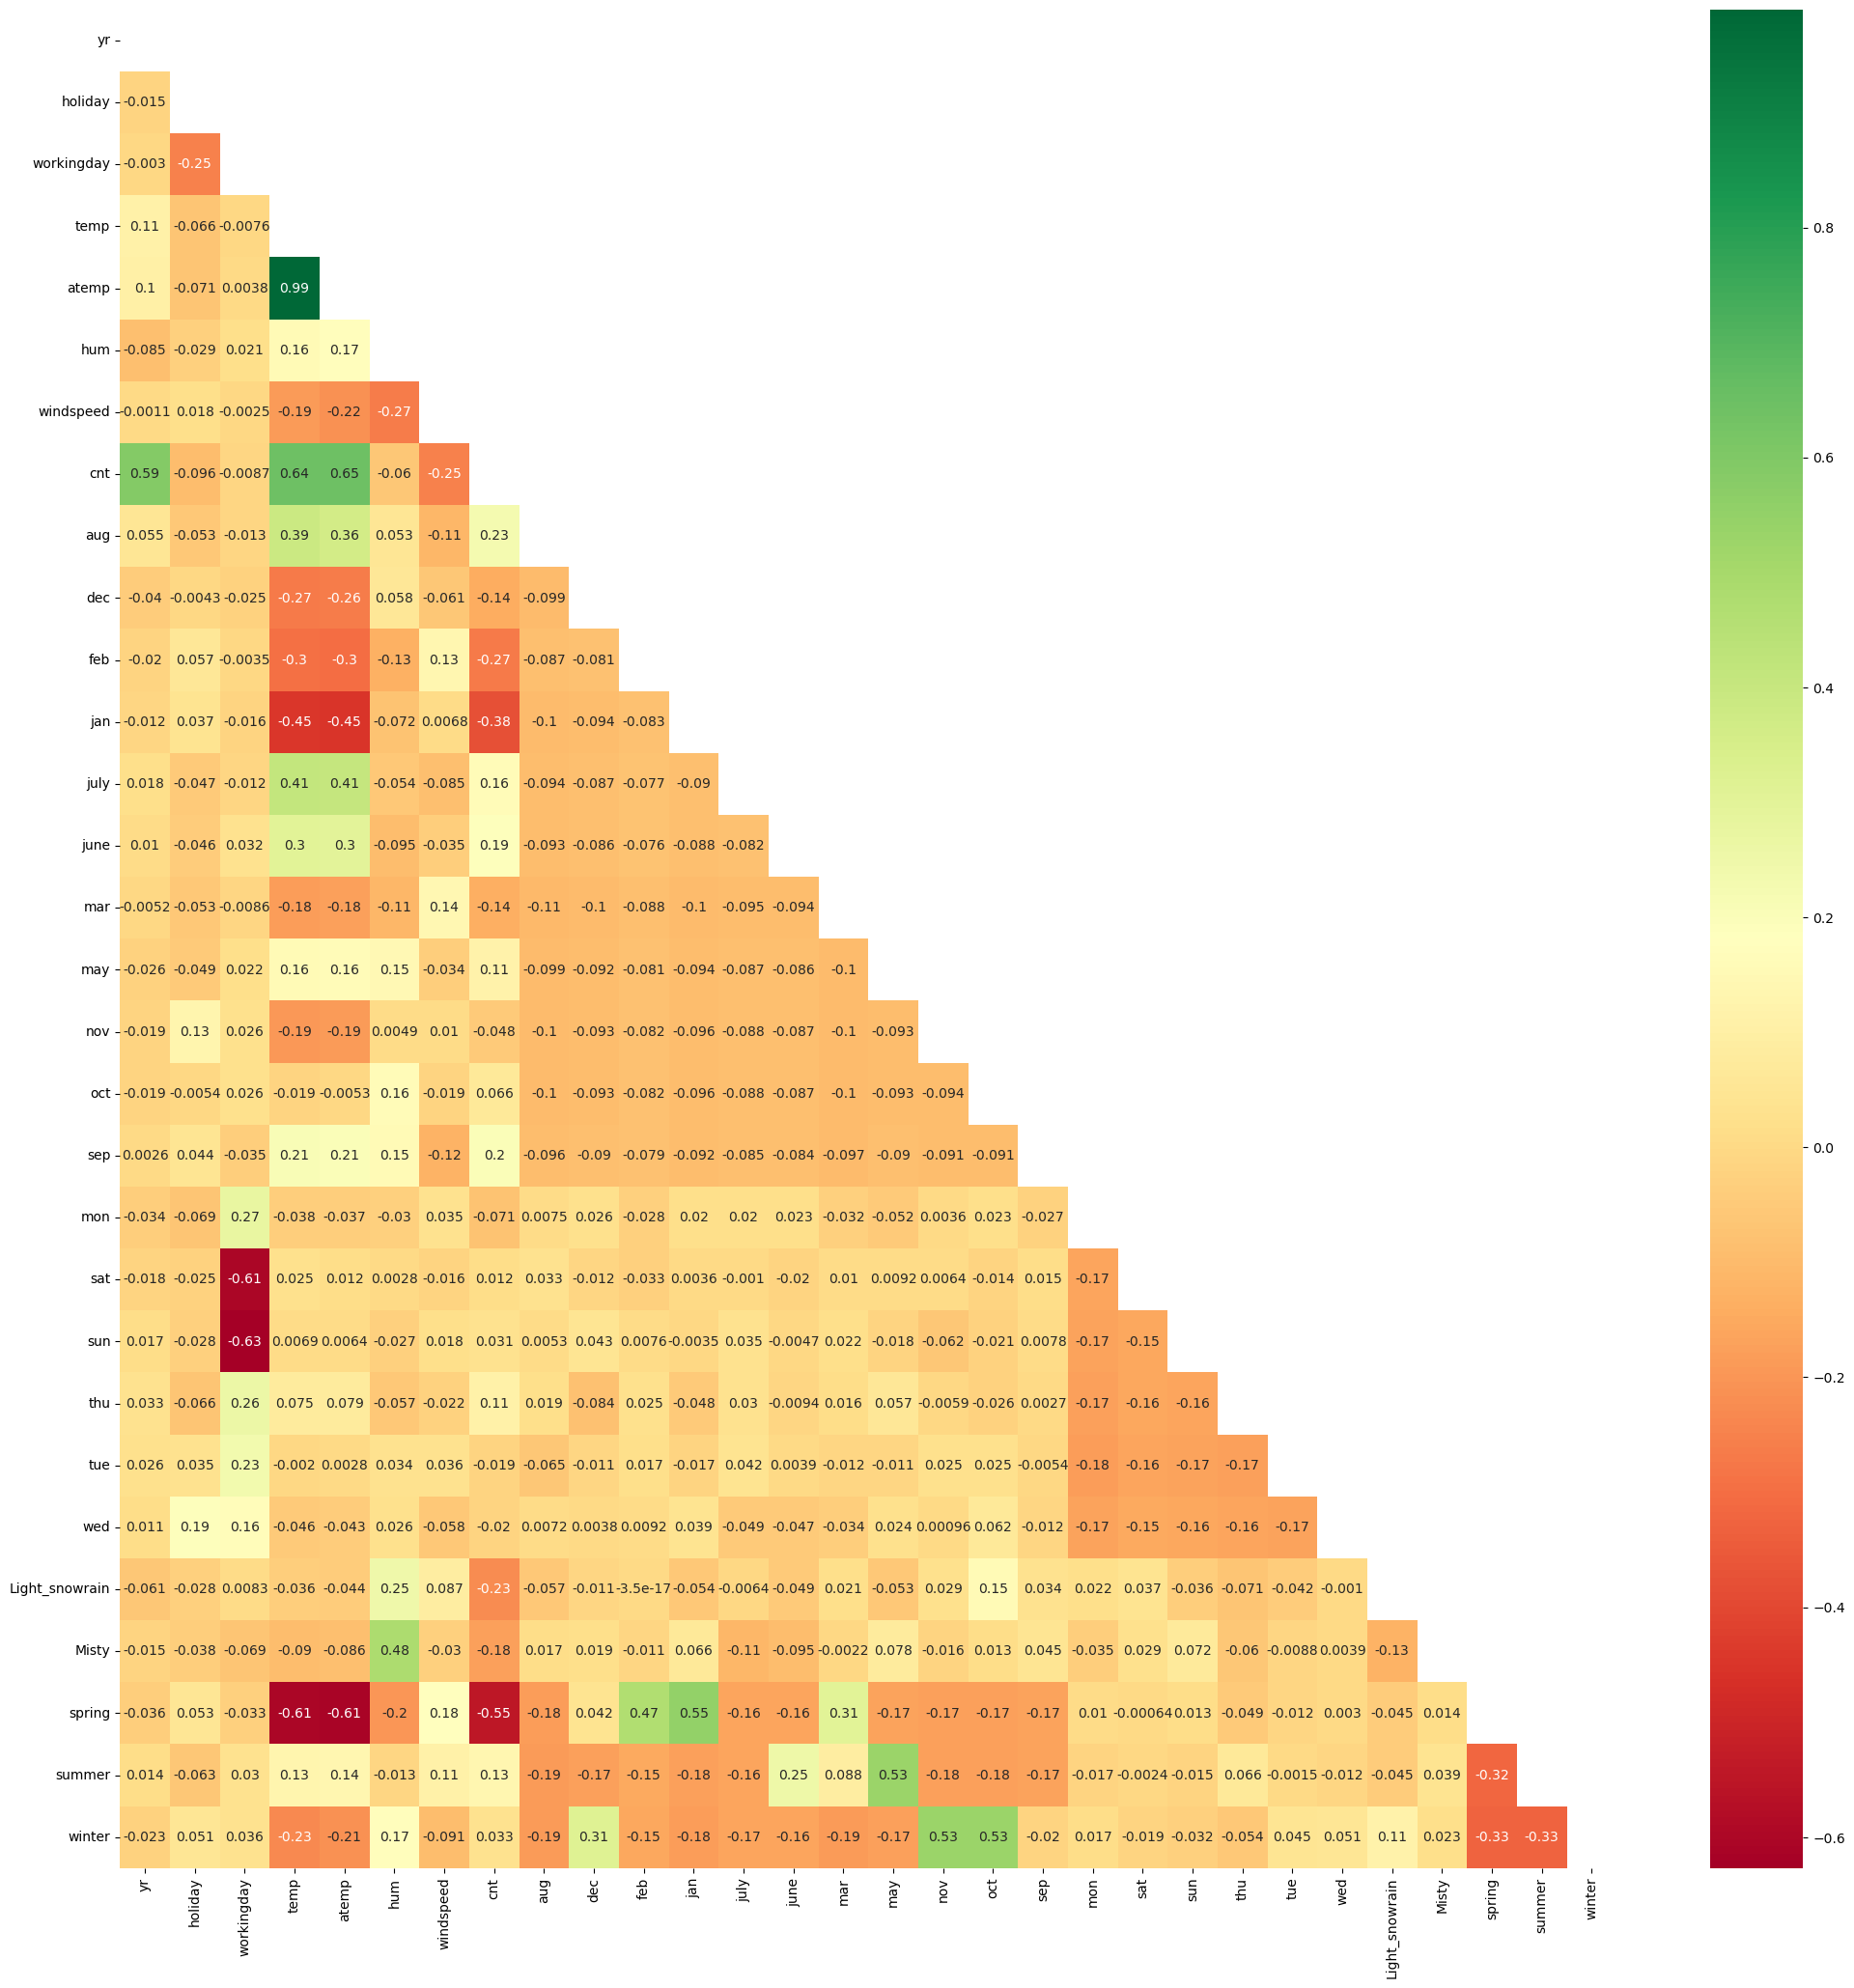

In [54]:
# Check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

#### 'cnt' seems to have +ve correlation with year variable and temp. Similarly, 'Misty' and 'hum' show +ve correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show +ve correlation. Whereas 'spring' shows -ve correlation with 'temp' and 'cnt' variable.

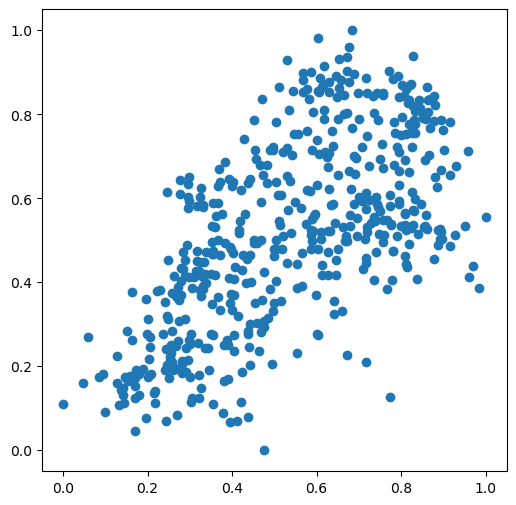

In [55]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

Visualization confirms the positive correlation between temp and cnt.

In [56]:
# Building the Linear Model

y_train = df_train.pop('cnt')
X_train = df_train

In [60]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 10)             
rfe = rfe.fit(X_train, y_train)

In [61]:
# List of variables selected in top 10 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 8),
 ('temp', True, 1),
 ('atemp', False, 11),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 15),
 ('dec', False, 6),
 ('feb', False, 7),
 ('jan', False, 4),
 ('july', True, 1),
 ('june', False, 19),
 ('mar', False, 20),
 ('may', False, 12),
 ('nov', False, 5),
 ('oct', False, 17),
 ('sep', True, 1),
 ('mon', False, 14),
 ('sat', False, 9),
 ('sun', False, 10),
 ('thu', False, 18),
 ('tue', False, 13),
 ('wed', False, 16),
 ('Light_snowrain', True, 1),
 ('Misty', False, 2),
 ('spring', True, 1),
 ('summer', False, 3),
 ('winter', True, 1)]

In [62]:
# Selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'july', 'sep',
       'Light_snowrain', 'spring', 'winter'],
      dtype='object')


In [63]:
# Checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may',
       'nov', 'oct', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'Misty',
       'summer'],
      dtype='object')

In [64]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [65]:
# Dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [66]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
3,hum,15.18
2,temp,13.09
4,windspeed,4.02
8,spring,2.40
0,yr,2.06
9,winter,1.98
5,july,1.40
6,sep,1.20
7,Light_snowrain,1.11
1,holiday,1.04


humidity shows high VIF value.

## Step 5: Building a linear model

In [67]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.9
Date:                Tue, 23 Jan 2024   Prob (F-statistic):          1.53e-184
Time:                        12:54:20   Log-Likelihood:                 489.69
No. Observations:                 510   AIC:                            -957.4
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3769      0.031     12.

In [68]:
# As hum shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['hum'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.40
3,windspeed,3.98
0,yr,2.06
7,spring,1.61
8,winter,1.37
4,july,1.34
5,sep,1.20
6,Light_snowrain,1.06
1,holiday,1.04


VIF values seems to be good now. Let's check the p value.

In [69]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     228.8
Date:                Tue, 23 Jan 2024   Prob (F-statistic):          5.33e-171
Time:                        12:55:19   Log-Likelihood:                 454.89
No. Observations:                 510   AIC:                            -889.8
Df Residuals:                     500   BIC:                            -847.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2042      0.025      8.

#### VIF value now seems to be good as it came below 5.

#### We can cosider the above model i.e lr_2, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.

####  The prob(F-statistics) of 5.33e-171 i.e almost equals to zero, states that the overall model is significant

In [70]:
# Checking the parameters and their coefficient values
lr_2.params

const             0.204152
yr                0.234993
holiday          -0.086151
temp              0.475763
windspeed        -0.132479
july             -0.061646
sep               0.049844
Light_snowrain   -0.256213
spring           -0.103199
winter            0.050374
dtype: float64

## Step 6: Residual Analysis of the train data and validation

In [71]:
X_train_lm_2

,const,yr,holiday,temp,windspeed,july,sep,Light_snowrain,spring,winter
653,1.0,1,0,0.509887,0.300794,0,0,0,0,1
576,1.0,1,0,0.815169,0.264686,1,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,1,0
728,1.0,1,0,0.245101,0.663106,0,0,0,1,0
482,1.0,1,0,0.395666,0.188475,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,0,0,0,0,0
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,1,0
350,1.0,0,0,0.248216,0.431816,0,0,0,0,1


In [72]:
y_train_pred = lr_2.predict(X_train_lm_2)

#### Normality of error terms

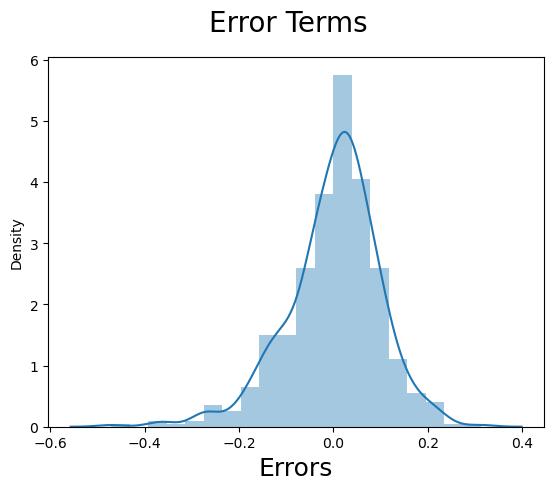

In [90]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)
plt.show()

Error terms are following normal distribution

#### Multi Colinearity

In [74]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.40
3,windspeed,3.98
0,yr,2.06
7,spring,1.61
8,winter,1.37
4,july,1.34
5,sep,1.20
6,Light_snowrain,1.06
1,holiday,1.04


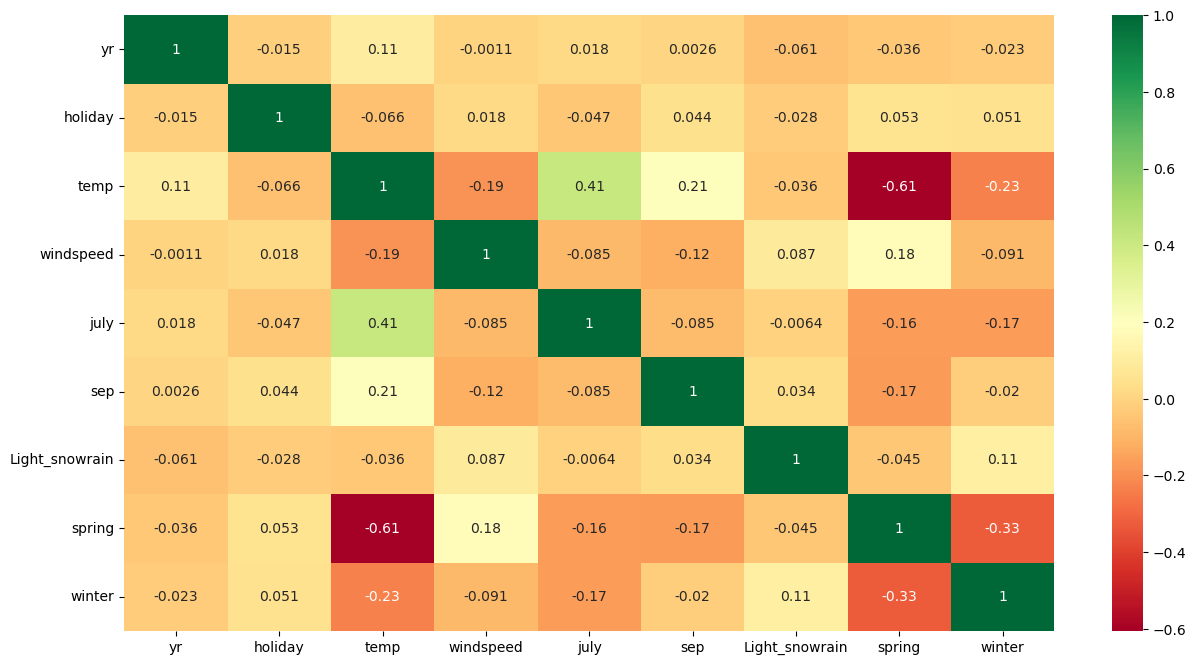

In [75]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 2nd model.

In [78]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,1,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,1,0,0,0,0,0,1,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,1,0,0,0,0,0,0,0,1,0


In [79]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.059361,0.086758,...,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635,0.255708,0.264840,0.232877
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.236840,0.282125,...,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403,0.437258,0.442259,0.423633
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
y_test = df_test.pop('cnt')
X_test = df_test

In [83]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe

X_test_lm_2 = sm.add_constant(X_test)

In [84]:
y_pred = lr_2.predict(X_test_lm_2)

In [85]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7888

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

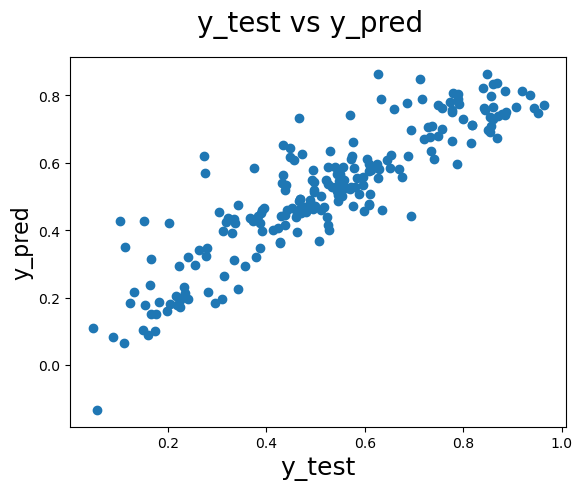

In [86]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)
plt.show()

In [87]:
round(lr_2.params,4)

const             0.2042
yr                0.2350
holiday          -0.0862
temp              0.4758
windspeed        -0.1325
july             -0.0616
sep               0.0498
Light_snowrain   -0.2562
spring           -0.1032
winter            0.0504
dtype: float64

We can see that the equation of our best fitted line is:

$ cnt = 0.2042 + 0.235  \times  year - 0.0862  \times  holiday + 0.4758 \times temp - 0.1325 \times windspeed - 0.0616 \times july + 0.0498 \times sep - 0.2562 \times Light_snowrain - 0.1032 \times spring + 0.0504 \times winter $

In [88]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2) * (X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7797


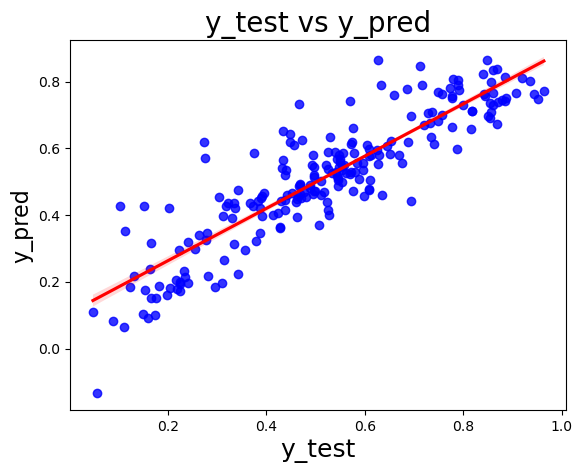

In [89]:
# Visualizing the fit on the test data
# Plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

# Comparision between Training and Testing dataset:
    - Train dataset R^2          : 0.805
    - Test dataset R^2           : 0.788
    - Train dataset Adjusted R^2 : 0.801    
    - Test dataset Adjusted R^2  : 0.7797

#### Demand of bikes depend on year, holiday, temp, windspeed, july, sep, Light_snowrain, spring and winter.